In [1]:
from __future__ import print_function
import os
import sys
import cv2
from matplotlib import pyplot as plt

from local_config import CURRENT_DIR
sys.path.append(os.path.join(CURRENT_DIR, ".."))
try:
    from config import Config
    from data_loader import KittiStixelDataset
except:
    print("failed to load module")

In [2]:
dt_config = Config()
stixel_dataset = KittiStixelDataset(data_path=dt_config.DATA_PATH, ground_truth_path=dt_config.GROUND_TRUTH_PATH)

(375, 1242, 3)


True

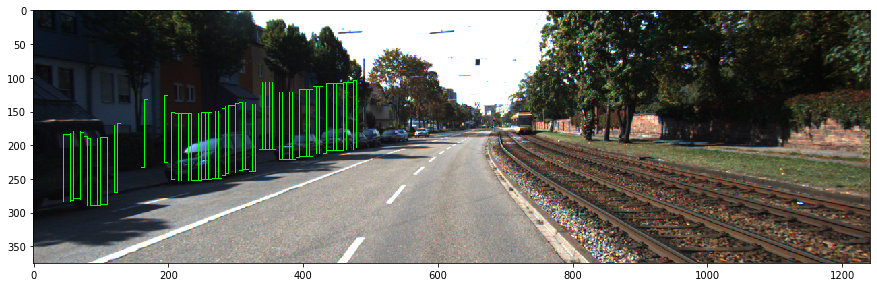

In [3]:
idx = 2

image, obstacle_pos = stixel_dataset[idx]
print(image.shape)

visualized_stixel = stixel_dataset.visualize_one_image(idx)

plt.figure(figsize=(15,15))
plt.imshow(cv2.cvtColor(visualized_stixel, cv2.COLOR_BGR2RGB))
cv2.imwrite("test.jpg", visualized_stixel)